In [1]:
#importing libraries here

import numpy as np
from google.colab import files
import pandas as pd
from sklearn.impute import SimpleImputer

from sklearn import preprocessing as process

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import matplotlib.pyplot as plt

#for confusion matrix 
import numpy
from sklearn import metrics

#for PCA
from sklearn.decomposition import PCA


import seaborn as sb
import warnings

In [2]:
from google.colab import drive

drive.mount("/drive")

Mounted at /drive


We load the dataset from our drive and see the first 5 instances of our dataset.

In [3]:
import pandas as pd

df = pd.read_csv("/drive/MyDrive/Spring 2023 Semester/CSE437/Breast_Cancer.csv")

df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68.0,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24.0,1,60,Alive
1,50.0,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14.0,5,62,Alive
2,58.0,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14.0,7,75,Alive
3,58.0,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2.0,1,84,Alive
4,47.0,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3.0,1,50,Alive


We get a description of the dataset from all the columns, numerical as well as categorical variables.

In [4]:
df.describe(include="all")

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
count,4007.000000,4024,4024,4024,4024,4024,4024,4024,4024,4024.000000,4024,4024,4017.000000,4024.000000,4024.000000,4024
unique,NaN,3,5,4,3,5,4,4,2,NaN,2,2,NaN,NaN,NaN,2
top,NaN,White,Married,T2,N1,IIA,Moderately differentiated,2,Regional,NaN,Positive,Positive,NaN,NaN,NaN,Alive
freq,NaN,3413,2643,1786,2732,1305,2351,2351,3932,NaN,3755,3326,NaN,NaN,NaN,3408
mean,53.968805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.473658,NaN,NaN,14.349017,4.158052,71.297962,NaN
std,8.972654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.119696,NaN,NaN,8.096786,5.109331,22.921430,NaN
min,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,NaN,9.000000,1.000000,56.000000,NaN
50%,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,14.000000,2.000000,73.000000,NaN
75%,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,NaN,19.000000,5.000000,90.000000,NaN


We printed the shape of the dataset here. We also drop the "differentiate" column because this column is completely similar with the "Grade" column. Here, 'Well Differentiated' is of Graded 01, 'Moderately Differentiated' is Graded 02, 'Poorly Differentiated' is Graded 03, and 'Undifferentiated' is Graded 04. We check the shape again after dropping the column.

In [5]:
print(df.shape)
print("\n")

print(df['differentiate'].unique())
print(df['Grade'].unique())

df.drop(columns=["differentiate"], inplace=True)
print("\n")
print(df.shape)

(4024, 16)


['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
['3' '2' '1' ' anaplastic; Grade IV']


(4024, 15)


We check the datatypes of the columns.

In [6]:
df.dtypes

Age                       float64
Race                       object
Marital Status             object
T Stage                    object
N Stage                    object
6th Stage                  object
Grade                      object
A Stage                    object
Tumor Size                  int64
Estrogen Status            object
Progesterone Status        object
Regional Node Examined    float64
Reginol Node Positive       int64
Survival Months             int64
Status                     object
dtype: object

We check if there's any Null value in any of the columns in our dataframe.

In [7]:
df.isnull().sum()

Age                       17
Race                       0
Marital Status             0
T Stage                    0
N Stage                    0
6th Stage                  0
Grade                      0
A Stage                    0
Tumor Size                 0
Estrogen Status            0
Progesterone Status        0
Regional Node Examined     7
Reginol Node Positive      0
Survival Months            0
Status                     0
dtype: int64

In [8]:
impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(df[['Age']])
df['Age'] = impute.transform(df[['Age']])

impute.fit(df[['Regional Node Examined']])
df['Regional Node Examined'] = impute.transform(df[['Regional Node Examined']])

In [9]:
df.isnull().sum() # Checking null values (not found any)

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

We check the if there's any duplicate values in the dataframe keeping the first duplicate occurances' as false.

In [10]:
duplicate_values = df[df.duplicated(keep = "first")]
print(duplicate_values.shape)
print("\n")
duplicate_values.sort_values(by = list(df.columns))

(1, 15)




,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
436,63.0,White,Married,T1,N1,IIA,2,Regional,17,Positive,Positive,9.0,1,56,Alive


As there's only one duplicate value, we drop it keeping the first row of it and change the source dataframe instead of returning a new instance, by keeping inplace value True.

In [11]:
print(df.shape)
df.drop_duplicates(keep = "first", inplace = True)
print("\n")
print(df.shape)
print("\n")
df[df.duplicated(keep = "first")]

(4024, 15)


(4023, 15)




,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status


Renamed a column's name due to having a whitespace in the original name.

In [12]:
df.rename(columns={"T Stage ": "T Stage"}, inplace=True)

Checking all the categorical variables' unique category names.

In [13]:
for i in df.columns:
  print(f"{i} - {df[i].nunique()}")

Age - 41
Race - 3
Marital Status - 5
T Stage - 4
N Stage - 3
6th Stage - 5
Grade - 4
A Stage - 2
Tumor Size - 110
Estrogen Status - 2
Progesterone Status - 2
Regional Node Examined - 55
Reginol Node Positive - 38
Survival Months - 107
Status - 2


Categorical Encoding to all the possible feature variables.

In [14]:
temp1 = {'White': 1, 'Black': 2, 'Other': 3}
df["Race"] = df["Race"].replace(temp1)

temp2 = {'Married': 1, 'Divorced': 2, 'Single ' : 3, 'Widowed': 4, 'Separated': 5}
df["Marital Status"] = df["Marital Status"].replace(temp2)

temp3 = {'T1': 1, 'T2': 2, 'T3': 3, 'T4': 4}
df["T Stage"] = df["T Stage"].replace(temp3)

temp4 = {'N1': 1, 'N2': 2, 'N3': 3}
df["N Stage"] = df["N Stage"].replace(temp4)

temp5 = {'IIA': 1, 'IIIA': 2, 'IIIC': 3, 'IIB': 4, 'IIIB': 5}
df["6th Stage"] = df["6th Stage"].replace(temp5)

temp6 = {'1': 1, '2': 2, '3': 3, ' anaplastic; Grade IV': 4}
df["Grade"] = df["Grade"].replace(temp6)

temp7 = {'Regional': 1, 'Distant': 2}
df["A Stage"] = df["A Stage"].replace(temp7)

temp8 = {'Regional': 1, 'Distant': 2}
df["A Stage"] = df["A Stage"].replace(temp8)

temp9 = {'Positive': 0, 'Negative': 1}
df["Estrogen Status"] = df["Estrogen Status"].replace(temp9)
df["Progesterone Status"] = df["Progesterone Status"].replace(temp9)

Using Label Encoder to encode the Target Variable "Status". 

In [15]:
from sklearn import preprocessing as process

label_encoder = process.LabelEncoder()
df["Status"]= label_encoder.fit_transform(df["Status"]) #Level Alive = 0 and Dead = 1

We will be using Correlation Coefficient to select features. 

<Axes: >

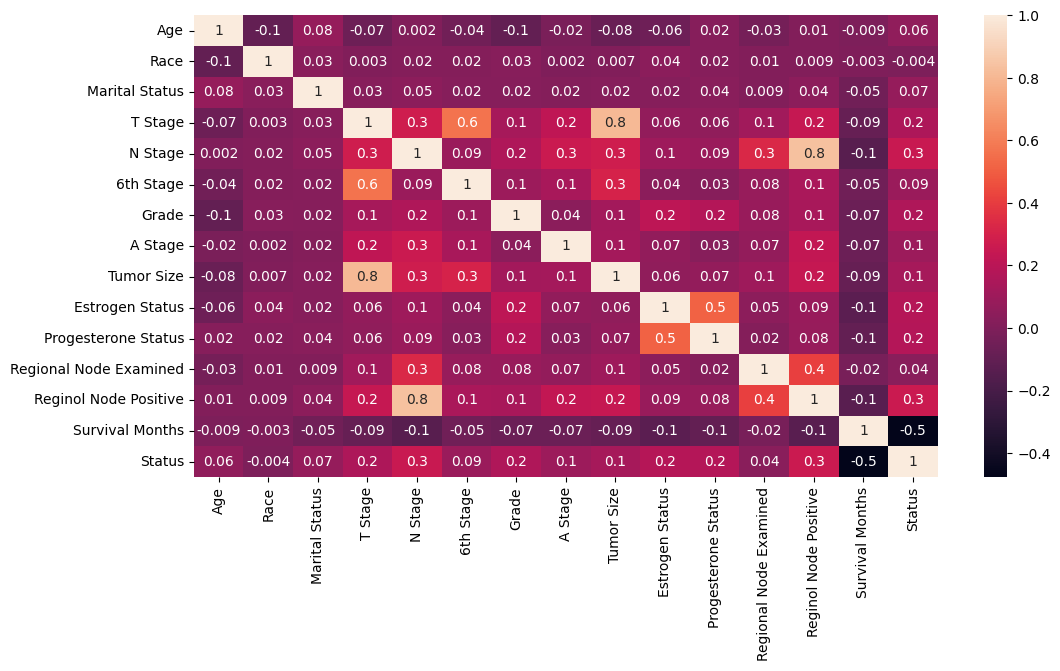

In [16]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(12,6))
sb.heatmap(df.corr(),annot=True, fmt='.1g')

In [17]:
print(df.shape)
print("\n")
df.drop(columns=["Race"], inplace=True)
print(df.shape)

(4023, 15)


(4023, 14)


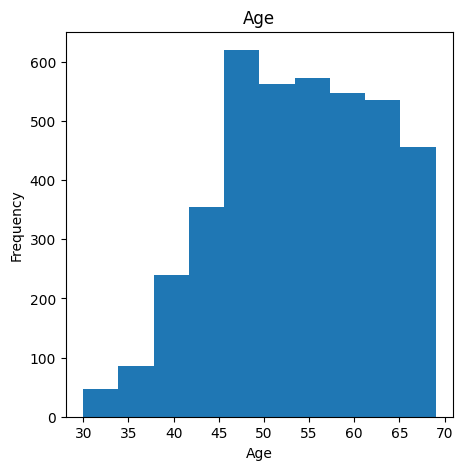

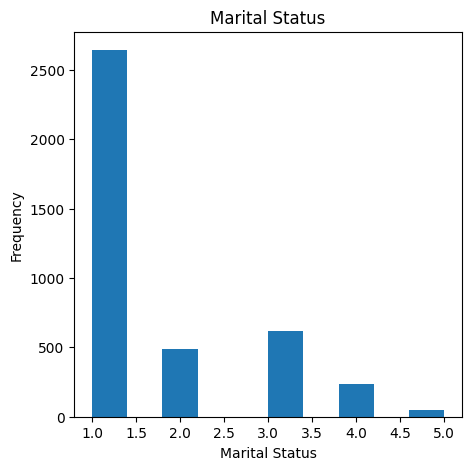

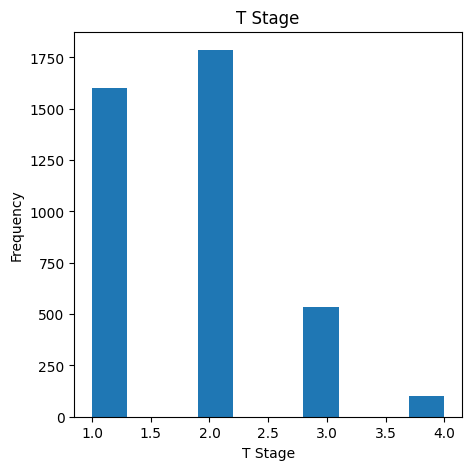

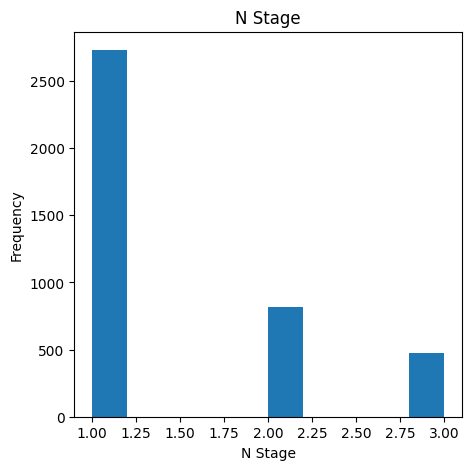

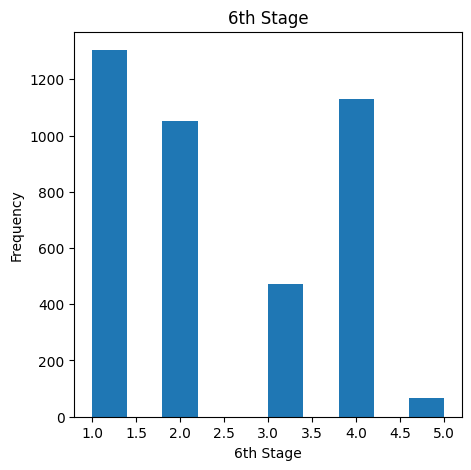

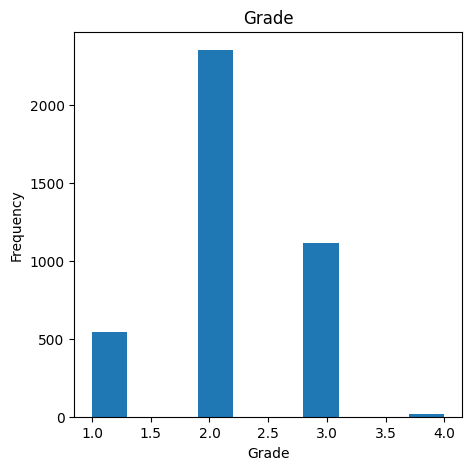

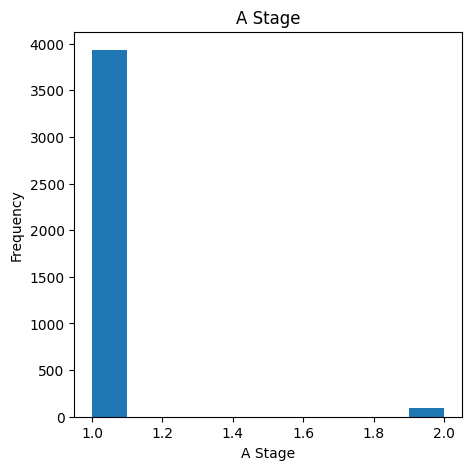

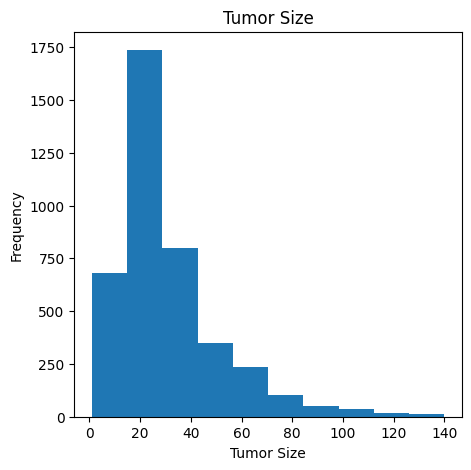

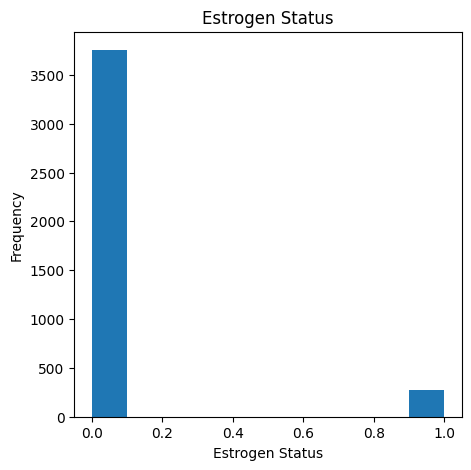

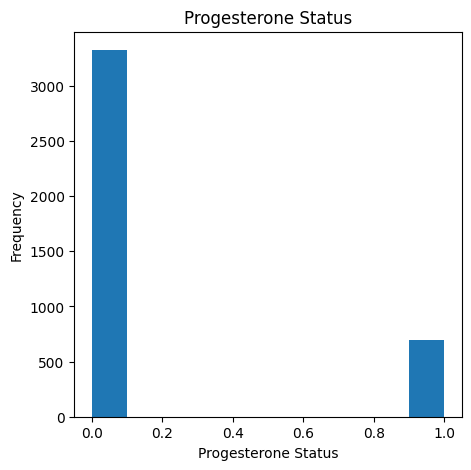

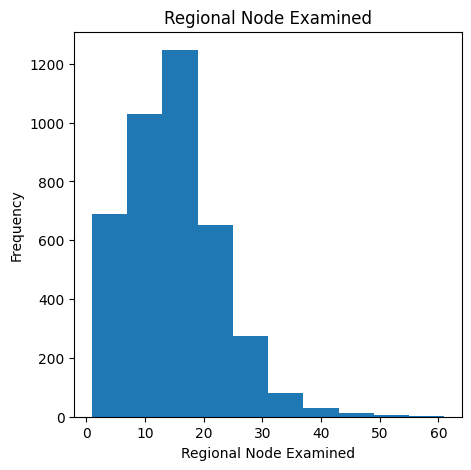

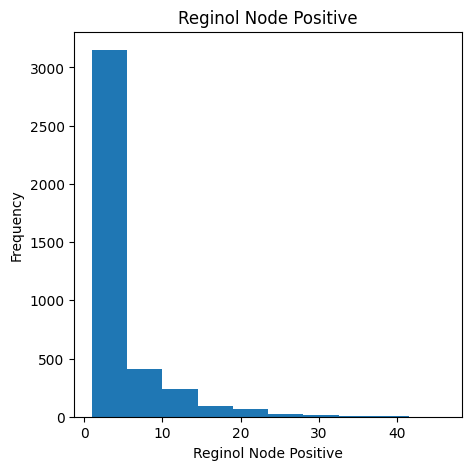

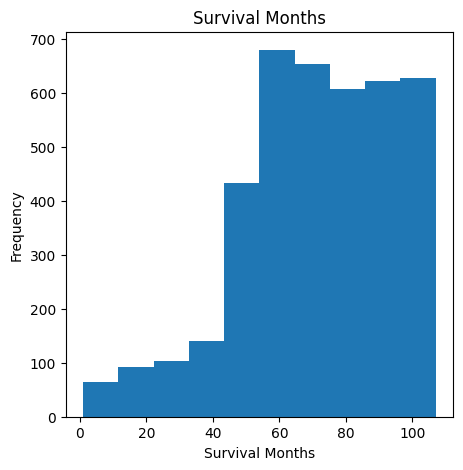

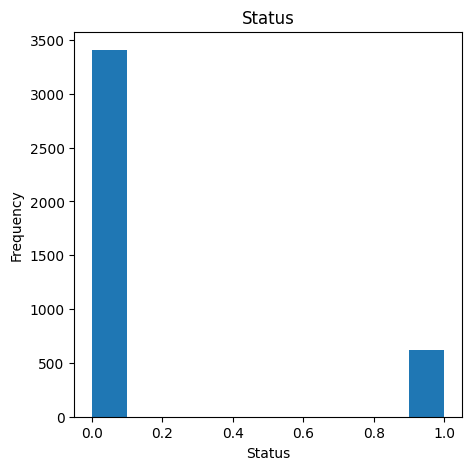

In [18]:
# Plotting frequency

for i in df:
    plt.figure(figsize = (5, 5))
    plt.hist(df[i])
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.title(f"{i}")
    plt.show()

We drop the "Race" column as we can see that it has the least value in the Correlation Matrix, compared to the target variable "Status".

We make a copy of the dataframe. We use MinMax Scaler to scale the feature variables with int64 datatype and comparatively larger numerical values. Those variables/columns are: "Age", "Tumor Size", "Regional Node Examined", "Reginol Node Positive", "Survival Months". Also, the MinMax scaler works in the following way: 

x_std = (x – x.min(axis=0)) / (x.max(axis=0) – x.min(axis=0))

x_scaled = (x_std * (max – min)) + min

Here, 
x: Value of a feature instance.

x.min(axis=0) : Minimum feature value. 

x.max(axis=0): Maximum feature value 

min, max: feature_range (by default it is 0 and 1)

In [19]:
df_scaled = df.copy()

scaler = process.MinMaxScaler()
df_scaled[["Age", "Tumor Size", "Regional Node Examined", "Reginol Node Positive", "Survival Months"]] = scaler.fit_transform(df_scaled[["Age", "Tumor Size", "Regional Node Examined", "Reginol Node Positive", "Survival Months"]])

We see the first 5 instances of our dataframe after scaling it.

In [20]:
df_scaled.head(5)

,Age,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,0.974359,1,1,1,1,3,1,0.021583,0,0,0.383333,0.000000,0.556604,0
1,0.512821,1,2,2,2,2,1,0.244604,0,0,0.216667,0.088889,0.575472,0
2,0.717949,2,3,3,3,2,1,0.446043,0,0,0.216667,0.133333,0.698113,0
3,0.717949,1,1,1,1,3,1,0.122302,0,0,0.016667,0.000000,0.783019,0
4,0.435897,1,2,1,4,3,1,0.287770,0,0,0.033333,0.000000,0.462264,0


We check the datatypes again after Categorical Encoding and Normalization/Scaling is completed.

In [21]:
df_scaled.dtypes

Age                       float64
Marital Status              int64
T Stage                     int64
N Stage                     int64
6th Stage                   int64
Grade                       int64
A Stage                     int64
Tumor Size                float64
Estrogen Status             int64
Progesterone Status         int64
Regional Node Examined    float64
Reginol Node Positive     float64
Survival Months           float64
Status                      int64
dtype: object

As we can see, all the categorical feature variables and also the target variable here have become of type int64 after encoding. We have to make them of type category again and recheck.

In [22]:
df_scaled["Marital Status"] = df_scaled["Marital Status"].astype("category")
assert df_scaled["Marital Status"].dtype == "category"

df_scaled["T Stage"] = df_scaled["T Stage"].astype("category")
assert df_scaled["T Stage"].dtype == "category"

df_scaled["N Stage"] = df_scaled["N Stage"].astype("category")
assert df_scaled["N Stage"].dtype == "category"

df_scaled["6th Stage"] = df_scaled["6th Stage"].astype("category")
assert df_scaled["6th Stage"].dtype == "category"

df_scaled["Grade"] = df_scaled["Grade"].astype("category")
assert df_scaled["Grade"].dtype == "category"

df_scaled["A Stage"] = df_scaled["A Stage"].astype("category")
assert df_scaled["A Stage"].dtype == "category"

df_scaled["Estrogen Status"] = df_scaled["Estrogen Status"].astype("category")
assert df_scaled["Estrogen Status"].dtype == "category"

df_scaled["Progesterone Status"] = df_scaled["Progesterone Status"].astype("category")
assert df_scaled["Progesterone Status"].dtype == "category"

df_scaled["Status"] = df_scaled["Status"].astype("category")
assert df_scaled["Status"].dtype == "category"

We recheck the datatype of all the variables again. It should be proper now.

In [23]:
df_scaled.dtypes

Age                        float64
Marital Status            category
T Stage                   category
N Stage                   category
6th Stage                 category
Grade                     category
A Stage                   category
Tumor Size                 float64
Estrogen Status           category
Progesterone Status       category
Regional Node Examined     float64
Reginol Node Positive      float64
Survival Months            float64
Status                    category
dtype: object

<Axes: xlabel='Status', ylabel='count'>

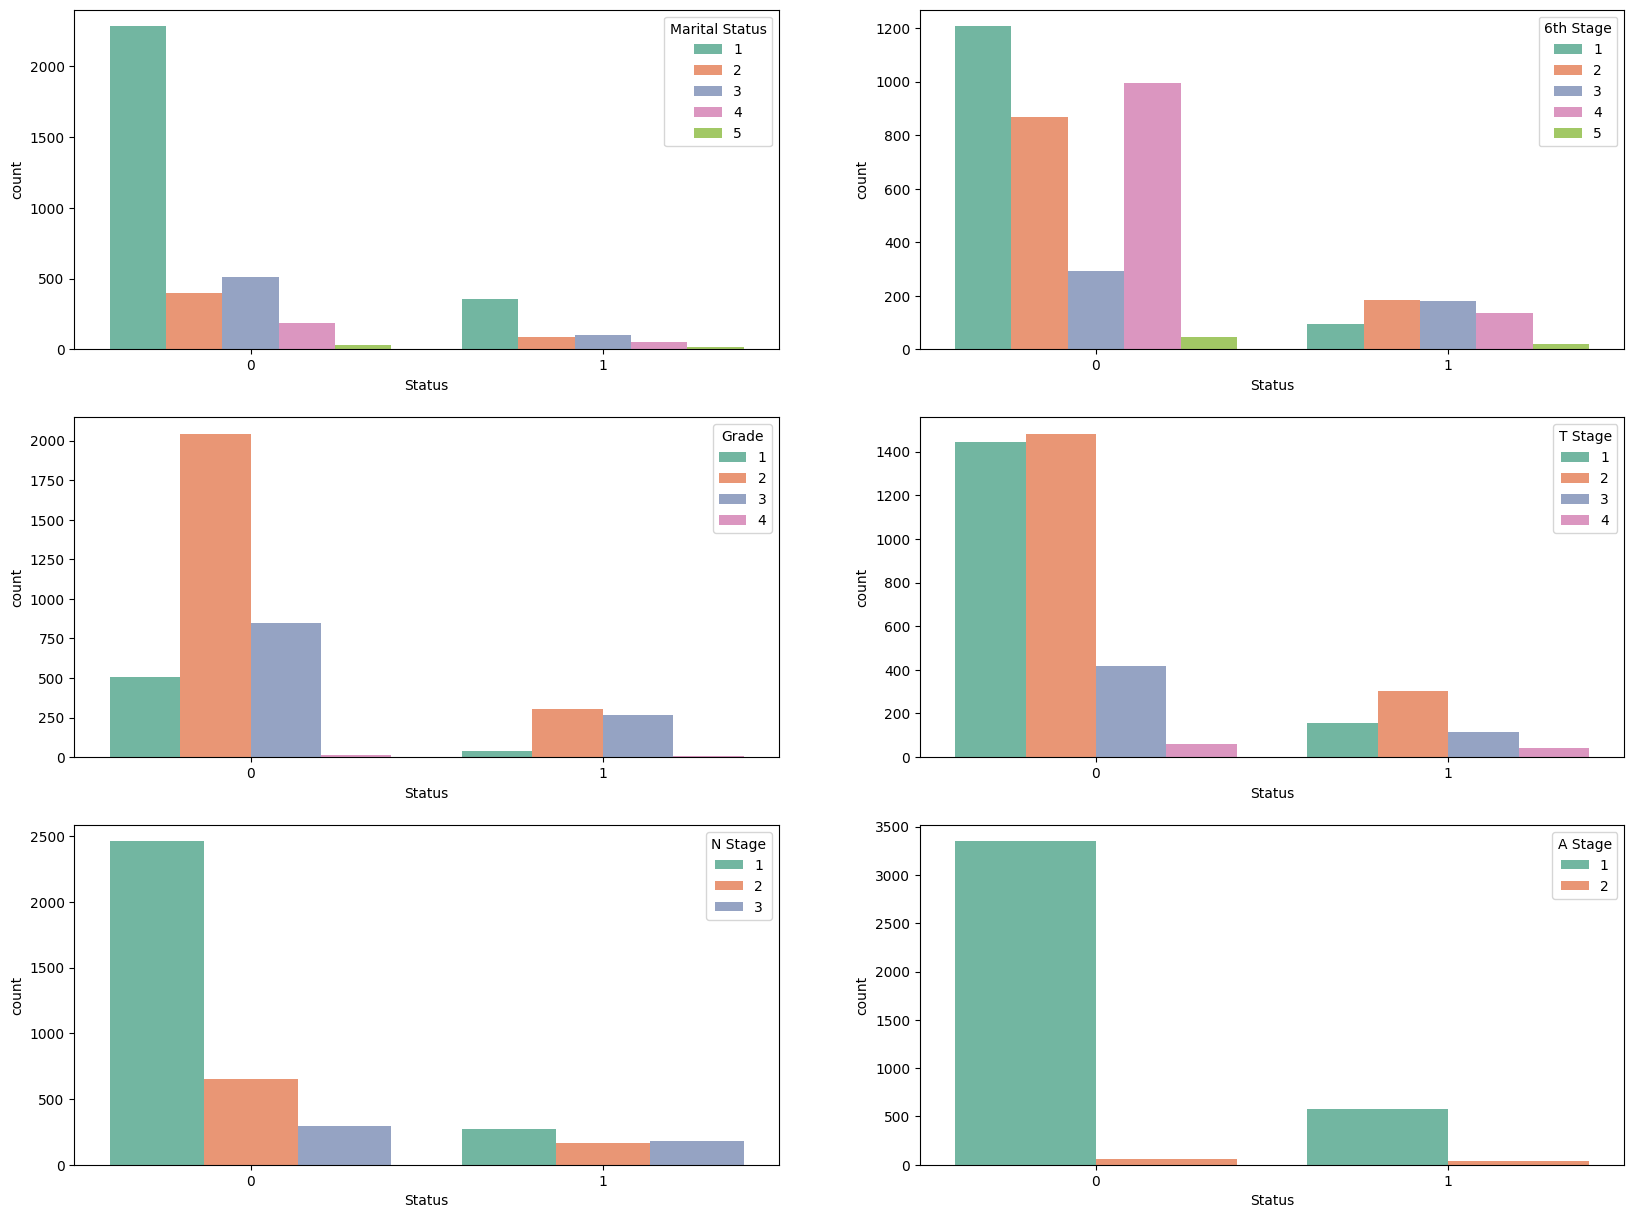

In [24]:
plt.figure(figsize = (20, 15))

plt.subplot(3,2,1)
sb.countplot(x = 'Status', hue= 'Marital Status', palette='Set2', data = df_scaled)

plt.subplot(3,2,2)
sb.countplot(x = 'Status', hue= '6th Stage', palette='Set2', data = df_scaled)

plt.subplot(3,2,3)
sb.countplot(x = 'Status', hue= 'Grade', palette='Set2', data = df_scaled)

plt.subplot(3,2,4)
sb.countplot(x = 'Status', hue= 'T Stage', palette='Set2', data = df_scaled)

plt.subplot(3,2,5)
sb.countplot(x = 'Status', hue= 'N Stage', palette='Set2', data = df_scaled)

plt.subplot(3,2,6)
sb.countplot(x = 'Status', hue= 'A Stage', palette='Set2', data = df_scaled)


<Axes: xlabel='Status', ylabel='count'>

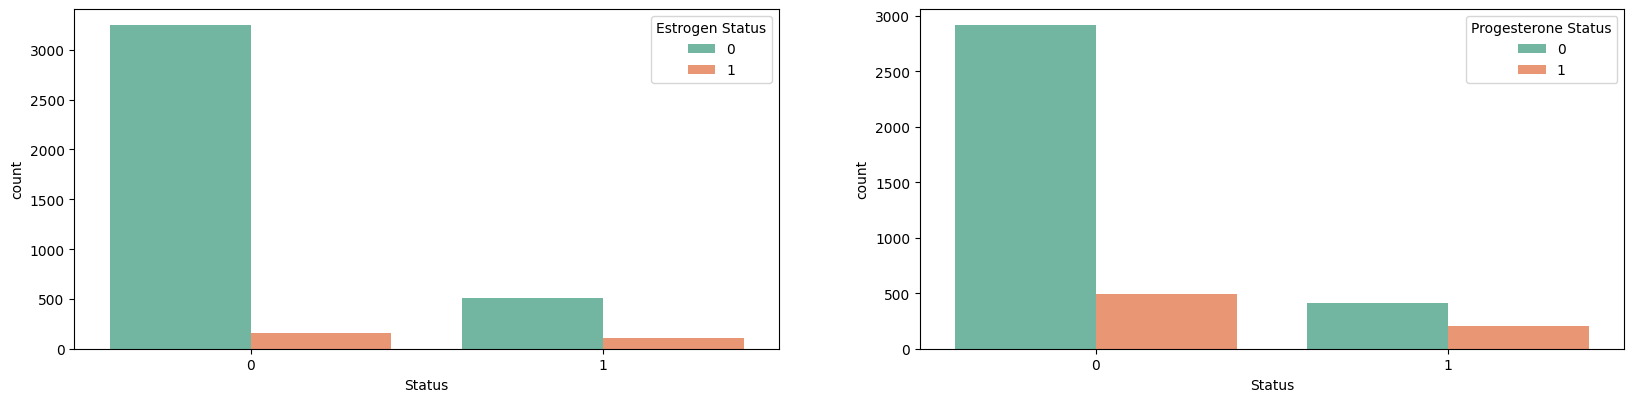

In [25]:
plt.figure(figsize = (20, 15))

plt.subplot(3,2,1)
sb.countplot(x = 'Status', hue= 'Estrogen Status', palette='Set2', data = df_scaled)

plt.subplot(3,2,2)
sb.countplot(x = 'Status', hue= 'Progesterone Status', palette='Set2', data = df_scaled)

<Axes: xlabel='Regional Node Examined', ylabel='Reginol Node Positive'>

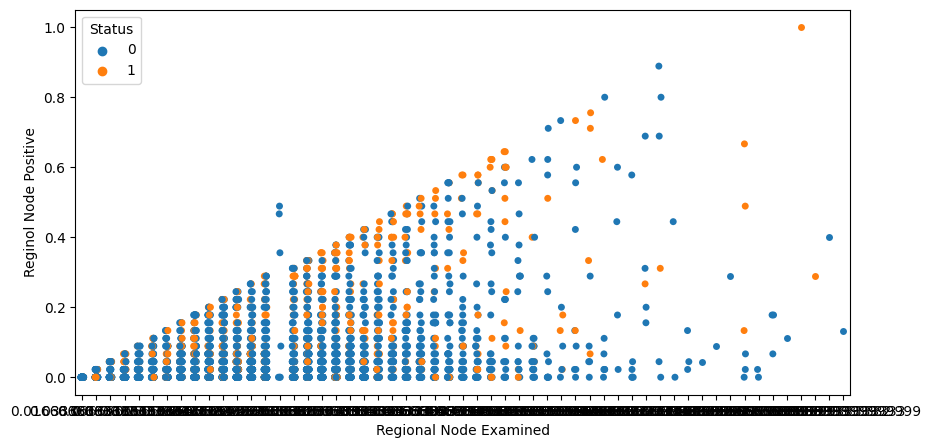

In [26]:
plt.figure(figsize = (10,5))
sb.stripplot(x = 'Regional Node Examined', y ='Reginol Node Positive', data = df_scaled, hue='Status')

<Figure size 1500x800 with 0 Axes>

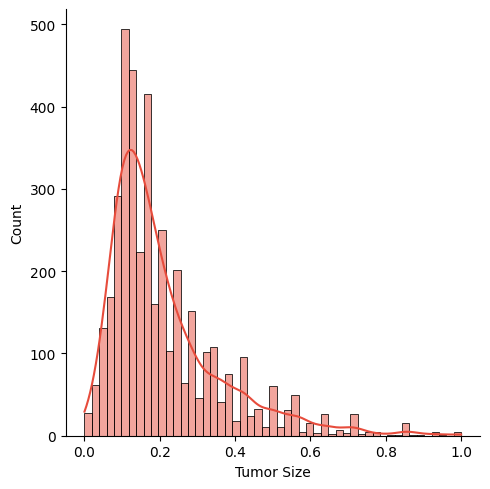

In [27]:
plt.figure(figsize=(15,8))
x=df_scaled['Tumor Size']
sb.displot(x,kde=True,color='#e74c3c')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

target = df_scaled[['Status']]
possible_features = df_scaled[['Age', 'Marital Status', 'T Stage', 'N Stage', '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']]

x = possible_features
y = target

x_remain, x_test, y_remain, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0, stratify = y)
x_train, x_dev, y_train, y_dev = train_test_split(x_remain, y_remain, test_size = 0.1, random_state = 0, stratify = y_remain)

print(x_train.shape)
print(y_train.shape)
print("\n")
print(x_dev.shape)
print(y_dev.shape)
print("\n")
print(x_test.shape)
print(y_test.shape)

target_labels = ['Alive', 'Dead']

(2896, 13)
(2896, 1)


(322, 13)
(322, 1)


(805, 13)
(805, 1)


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

random_forest_model = RandomForestClassifier(criterion='entropy')
svc_model = SVC(kernel='poly', degree=5, gamma="auto")
knn_model = KNeighborsClassifier(metric = 'manhattan', weights = 'distance', n_neighbors = 7)
abc_model = AdaBoostClassifier(n_estimators = 15, estimator = random_forest_model, learning_rate = 0.01)

model_names = ["Random Forest Classifier", "Support Vector Classifier", "K Nearest Neighbours Classifier", "AdaBoost Classifier"]
models = [random_forest_model, svc_model, knn_model, abc_model]

In [31]:
from seaborn import heatmap
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

prediction_values_dev = []
prediction_values_test = []

accuracy_scores_dev = []
accuracy_scores_test = []

recall_scores_dev = []
recall_scores_test = []

precision_scores_dev = []
precision_scores_test = []

f1_scores_dev = []
f1_scores_test = []

for model in models:
  model.fit(x_train, y_train.values.ravel())

  prediction = model.predict(x_dev)
  accuracy = accuracy_score(y_dev, prediction)
  precision = precision_score(y_dev, prediction, average = "weighted")
  recall = recall_score(y_dev, prediction, average = "weighted")
  f1 = f1_score(y_dev, prediction, average = "weighted")

  prediction_values_dev.append(prediction)
  accuracy_scores_dev.append(accuracy)
  recall_scores_dev.append(recall)
  precision_scores_dev.append(precision)
  f1_scores_dev.append(f1)

  prediction = model.predict(x_test)
  accuracy = accuracy_score(y_test, prediction)
  precision = precision_score(y_test, prediction, average = "weighted")
  recall = recall_score(y_test, prediction, average = "weighted")
  f1 = f1_score(y_test, prediction, average = "weighted")

  prediction_values_test.append(prediction)
  accuracy_scores_test.append(accuracy)
  recall_scores_test.append(recall)
  precision_scores_test.append(precision)
  f1_scores_test.append(f1)

#Random Forest Classifier


Random Forest Classifier 
---------------------------------------------------------------- 

Development Accuracy Store: 0.922360248447205
Development Precision Score: 0.9187446717817563
Development Recall Score: 0.922360248447205
Development F1 Score: 0.9163825728396031


              precision    recall  f1-score   support

       Alive       0.93      0.98      0.96       273
        Dead       0.85      0.59      0.70        49

    accuracy                           0.92       322
   macro avg       0.89      0.79      0.83       322
weighted avg       0.92      0.92      0.92       322



Test Accuracy Store: 0.901863354037267
Test Precision Score: 0.8965775472982628
Test Recall Score: 0.901863354037267
Test F1 Score: 0.889033228769483


              precision    recall  f1-score   support

       Alive       0.91      0.98      0.94       682
        Dead       0.83      0.45      0.58       123

    accuracy                           0.90       805
   macro avg       0.87    

<Axes: >

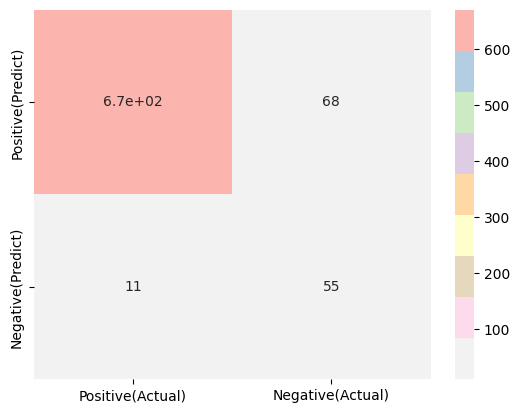

In [32]:
print(model_names[0],"\n---------------------------------------------------------------- \n")

print("Development Accuracy Store:",accuracy_scores_dev[0])
print("Development Precision Score:",precision_scores_dev[0])
print("Development Recall Score:",recall_scores_dev[0])
print("Development F1 Score:",f1_scores_dev[0])

print("\n")

print(classification_report(y_dev, prediction_values_dev[0], target_names = target_labels))

print("\n")

print("Test Accuracy Store:",accuracy_scores_test[0])
print("Test Precision Score:",precision_scores_test[0])
print("Test Recall Score:",recall_scores_test[0])
print("Test F1 Score:",f1_scores_test[0])

print("\n")

print(classification_report(y_test, prediction_values_test[0], target_names = target_labels))

conf_matrix = confusion_matrix(prediction_values_test[0], y_test)
heatmap(conf_matrix , cmap="Pastel1_r", xticklabels=['Positive(Actual)' ,'Negative(Actual)' ], yticklabels=['Positive(Predict)' ,'Negative(Predict)' ], annot=True)

#Support Vector Classifier

Support Vector Classifier 
---------------------------------------------------------------- 

Development Accuracy Store: 0.8881987577639752
Development Precision Score: 0.8770000665196412
Development Recall Score: 0.8881987577639752
Development F1 Score: 0.8758405521349139


              precision    recall  f1-score   support

       Alive       0.90      0.97      0.94       273
        Dead       0.72      0.43      0.54        49

    accuracy                           0.89       322
   macro avg       0.81      0.70      0.74       322
weighted avg       0.88      0.89      0.88       322



Test Accuracy Store: 0.867080745341615
Test Precision Score: 0.8470583686397104
Test Recall Score: 0.867080745341615
Test F1 Score: 0.8424132551347402


              precision    recall  f1-score   support

       Alive       0.88      0.98      0.93       682
        Dead       0.66      0.27      0.38       123

    accuracy                           0.87       805
   macro avg       0.77

<Axes: >

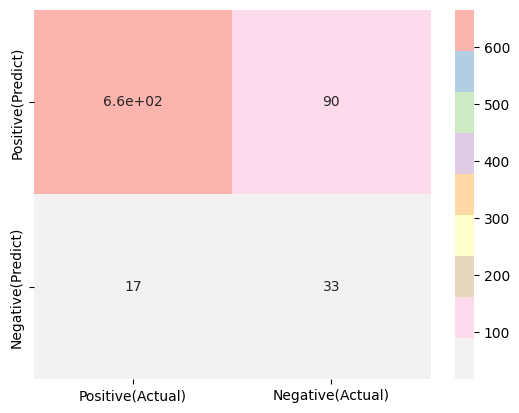

In [33]:
print(model_names[1],"\n---------------------------------------------------------------- \n")

print("Development Accuracy Store:",accuracy_scores_dev[1])
print("Development Precision Score:",precision_scores_dev[1])
print("Development Recall Score:",recall_scores_dev[1])
print("Development F1 Score:",f1_scores_dev[1])

print("\n")

print(classification_report(y_dev, prediction_values_dev[1], target_names = target_labels))

print("\n")

print("Test Accuracy Store:",accuracy_scores_test[1])
print("Test Precision Score:",precision_scores_test[1])
print("Test Recall Score:",recall_scores_test[1])
print("Test F1 Score:",f1_scores_test[1])

print("\n")

print(classification_report(y_test, prediction_values_test[1], target_names = target_labels))

conf_matrix = confusion_matrix(prediction_values_test[1], y_test)
heatmap(conf_matrix , cmap="Pastel1_r", xticklabels=['Positive(Actual)' ,'Negative(Actual)' ], yticklabels=['Positive(Predict)' ,'Negative(Predict)' ], annot=True)

#K Nearest Neighbours Classifier

K Nearest Neighbours Classifier 
---------------------------------------------------------------- 

Development Accuracy Store: 0.8695652173913043
Development Precision Score: 0.8523919332522745
Development Recall Score: 0.8695652173913043
Development F1 Score: 0.8415553154533145


              precision    recall  f1-score   support

       Alive       0.88      0.98      0.93       273
        Dead       0.71      0.24      0.36        49

    accuracy                           0.87       322
   macro avg       0.79      0.61      0.65       322
weighted avg       0.85      0.87      0.84       322



Test Accuracy Store: 0.8583850931677018
Test Precision Score: 0.8317375211914887
Test Recall Score: 0.8583850931677018
Test F1 Score: 0.8257777320232281


              precision    recall  f1-score   support

       Alive       0.87      0.98      0.92       682
        Dead       0.62      0.20      0.30       123

    accuracy                           0.86       805
   macro avg   

<Axes: >

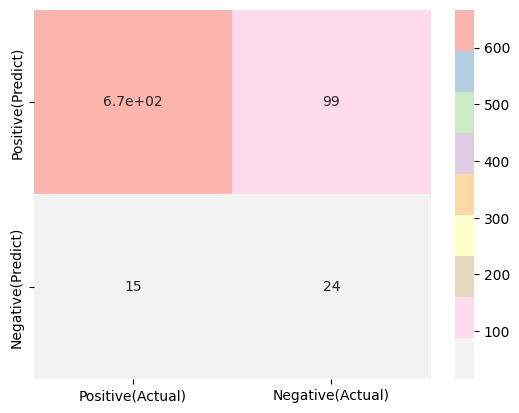

In [34]:
print(model_names[2],"\n---------------------------------------------------------------- \n")

print("Development Accuracy Store:",accuracy_scores_dev[2])
print("Development Precision Score:",precision_scores_dev[2])
print("Development Recall Score:",recall_scores_dev[2])
print("Development F1 Score:",f1_scores_dev[2])

print("\n")

print(classification_report(y_dev, prediction_values_dev[2], target_names = target_labels))

print("\n")

print("Test Accuracy Store:",accuracy_scores_test[2])
print("Test Precision Score:",precision_scores_test[2])
print("Test Recall Score:",recall_scores_test[2])
print("Test F1 Score:",f1_scores_test[2])

print("\n")

print(classification_report(y_test, prediction_values_test[2], target_names = target_labels))

conf_matrix = confusion_matrix(prediction_values_test[2], y_test)
heatmap(conf_matrix , cmap="Pastel1_r", xticklabels=['Positive(Actual)' ,'Negative(Actual)' ], yticklabels=['Positive(Predict)' ,'Negative(Predict)' ], annot=True)

#AdaBoost Classifier

AdaBoost Classifier 
---------------------------------------------------------------- 

Development Accuracy Store: 0.9161490683229814
Development Precision Score: 0.9111220904699164
Development Recall Score: 0.9161490683229814
Development F1 Score: 0.9107119490870159


              precision    recall  f1-score   support

       Alive       0.93      0.97      0.95       273
        Dead       0.81      0.59      0.68        49

    accuracy                           0.92       322
   macro avg       0.87      0.78      0.82       322
weighted avg       0.91      0.92      0.91       322



Test Accuracy Store: 0.901863354037267
Test Precision Score: 0.8965775472982628
Test Recall Score: 0.901863354037267
Test F1 Score: 0.889033228769483


              precision    recall  f1-score   support

       Alive       0.91      0.98      0.94       682
        Dead       0.83      0.45      0.58       123

    accuracy                           0.90       805
   macro avg       0.87      0

<Axes: >

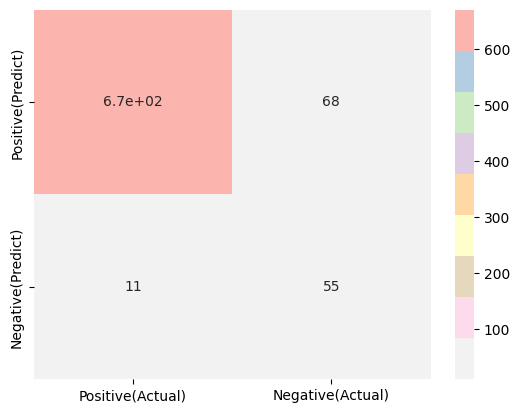

In [35]:
print(model_names[3],"\n---------------------------------------------------------------- \n")

print("Development Accuracy Store:",accuracy_scores_dev[3])
print("Development Precision Score:",precision_scores_dev[3])
print("Development Recall Score:",recall_scores_dev[3])
print("Development F1 Score:",f1_scores_dev[3])

print("\n")

print(classification_report(y_dev, prediction_values_dev[3], target_names = target_labels))

print("\n")

print("Test Accuracy Store:",accuracy_scores_test[3])
print("Test Precision Score:",precision_scores_test[3])
print("Test Recall Score:",recall_scores_test[3])
print("Test F1 Score:",f1_scores_test[3])

print("\n")

print(classification_report(y_test, prediction_values_test[3], target_names = target_labels))

conf_matrix = confusion_matrix(prediction_values_test[3], y_test)
heatmap(conf_matrix , cmap="Pastel1_r", xticklabels=['Positive(Actual)' ,'Negative(Actual)' ], yticklabels=['Positive(Predict)' ,'Negative(Predict)' ], annot=True)

In [36]:
from sklearn.decomposition import PCA

pca = PCA()
x_train_pca = pca.fit_transform(x_train)
x_dev_pca = pca.transform(x_dev)
x_test_pca = pca.transform(x_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.41372875 0.22645534 0.12796343 0.08708808 0.0671481  0.0354194
 0.01211878 0.01044307 0.00866297 0.00486692 0.00375142 0.00157267
 0.00078108]


In [37]:
pca = PCA(n_components = 3)
x_train_pca = pca.fit_transform(x_train)
x_dev_pca = pca.transform(x_dev)
x_test_pca = pca.transform(x_test)

count = 0
while count < 4:
  print(model_names[count],"\n---------------------------------------------------------------- \n")
  models[count].fit(x_train_pca, y_train.values.ravel())

  prediction = models[count].predict(x_test_pca)
  print(classification_report(y_test, prediction, target_names = target_labels))

  count = count + 1

Random Forest Classifier 
---------------------------------------------------------------- 

              precision    recall  f1-score   support

       Alive       0.87      0.95      0.91       682
        Dead       0.45      0.20      0.28       123

    accuracy                           0.84       805
   macro avg       0.66      0.58      0.59       805
weighted avg       0.80      0.84      0.81       805

Support Vector Classifier 
---------------------------------------------------------------- 

              precision    recall  f1-score   support

       Alive       0.85      0.99      0.91       682
        Dead       0.33      0.03      0.06       123

    accuracy                           0.84       805
   macro avg       0.59      0.51      0.49       805
weighted avg       0.77      0.84      0.78       805

K Nearest Neighbours Classifier 
---------------------------------------------------------------- 

              precision    recall  f1-score   support

    

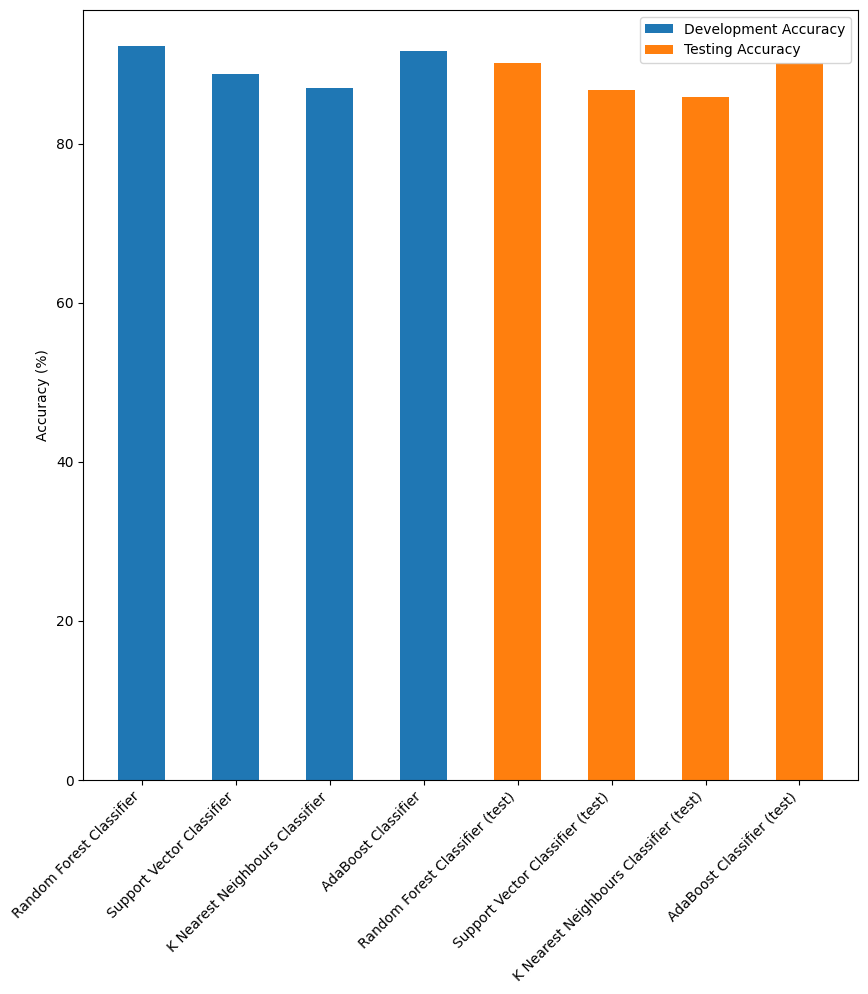

In [38]:
import matplotlib.pyplot as plt

# Create a list of tuples containing the model name and its accuracy scores
models_bar = [(model_names[0], accuracy_scores_dev[0]*100, accuracy_scores_test[0]*100),
          (model_names[1], accuracy_scores_dev[1]*100, accuracy_scores_test[1]*100),
          (model_names[2], accuracy_scores_dev[2]*100, accuracy_scores_test[2]*100),
          (model_names[3], accuracy_scores_dev[3]*100, accuracy_scores_test[3]*100)]

# Create lists for model names, training accuracies, and testing accuracies
model_names = [model[0] for model in models_bar]
training_accs = [model[1] for model in models_bar]
testing_accs = [model[2] for model in models_bar]

# Plot the accuracies
plt.figure(figsize=(10, 10))
plt.bar(model_names, training_accs, width=0.5, label='Development Accuracy')
plt.bar([name + ' (test)' for name in model_names], testing_accs, width=0.5, label='Testing Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()